# Exploratory data analysis of Housing Demolition Permits of Baltimore

__source__ : https://data.baltimorecity.gov/api/views/ad7n-rq74/rows.csv?accessType=DOWNLOAD <br>

__Observation__ : Data set contains details of Housing permits for demolition of the Baltimore city. Baltimore Housing's Office of Permits & Building Inspections enforces the Baltimore City Building Code, as well as state laws pertaining to construction and occupancy. This office issues building permits and provides subsequent inspections for; construction, alteration, electrical, mechanical and plumbing work in both commercial and residential structures. This dataset consists of details like case number, permit number, Date of Issue, Cost Estimation, location and address of the property.


__Hypothesis 1__ : Number of demolition permissions issued in summer(June - August) and autumn(September - November) are more than the  spring(March - May) and the winter(December - February) because the climatic conditions in summer and autumn are favourable for construction workers<br>
__Conclusion__ : From the analysis it is verified that the Results obtained supports the hypothesis

__Hypothesis 2__ : Cases registered for Estimated cost of demolition above 10000 are fewer compared to the cases with cost of estimation less than 10000 because most of the houses in the city of baltimore are small<br>
__Conclusion__ : From the analysis the results contradicts the hypothesis

> __Import necessary libraries__

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from datetime import datetime
from itertools import cycle, islice
pd.options.mode.chained_assignment = None 

> __Loading the data from url path to Data frame using pandas__

In [2]:
path = "https://data.baltimorecity.gov/api/views/ad7n-rq74/rows.csv?accessType=DOWNLOAD"
df = pd.read_csv(path, encoding = 'utf-8')
df


,CaseNum,Block,Lot,PropertyAddress,PermitNum,DateIssue,PermitDescription,Cost_Est,DateExpire,Prop_Use,Existing_Use,Neighborhood,PoliceDistrict,CouncilDistrict,Location
0,DEM2002-00004,1858,029,2711 FOSTER AVE,DEM2002-00004,06/05/2002,authorization to raze building by dismantling ...,18000.0,12/05/2002,NaN,NaN,CANTON,Southeastern,1.0,"2711 FOSTER AVE\nBaltimore, MD\n(39.284173, -7..."
1,DEM2002-00005,8415,028,5207 MUTH AVE,DEM2002-00005,04/25/2002,authorization to raze bldg by dismantling incl...,10000.0,NaN,NaN,NaN,FRANKLINTOWN,Southwestern,8.0,"5207 MUTH AVE\nBaltimore, MD\n(39.310268, -76...."
2,DEM2002-00006,1602,034,827 RUTLAND AVE,DEM2002-00006,04/29/2002,authorization to raze buildings by dismantling...,3000.0,NaN,NaN,NaN,MIDDLE EAST,NaN,NaN,"827 RUTLAND AVE\nBaltimore, MD\n(39.300273, -7..."
3,DEM2002-00008,5180A,020,709 WINSTON AVE,DEM2002-00008,05/09/2002,authorization to raze bldg by dislmantling inc...,18000.0,11/09/2002,NaN,NaN,WINSTON-GOVANS,Northern,4.0,"709 WINSTON AVE\nBaltimore, MD\n(39.349859, -7..."
4,DEM2002-00009,7186,003,1420 CEDDOX ST,DEM2002-00009,05/02/2002,authorization to raze bldg by dismantling incl...,5000.0,07/15/2004,NaN,NaN,CURTIS BAY,NaN,NaN,"1420 CEDDOX ST\nBaltimore, MD\n(39.221051, -76..."
5,DEM2002-00010,3311,011,4222 PARK HEIGHTS AVE,DEM2002-00010,05/10/2002,authorization to raze bldg by dismantling incl...,24000.0,09/25/2004,NaN,NaN,CENTRAL PARK HEIGHTS,Northwestern,6.0,"4222 PARK HEIGHTS AVE\nBaltimore, MD\n(39.3372..."
6,DEM2002-00011,2254,020,3525 W CATON AVE,DEM2002-00011,05/13/2002,authorization to raze bldg by dismantling incl...,7500.0,11/13/2002,NaN,NaN,SAINT JOSEPHS,Southwestern,8.0,"3525 W CATON AVE\nBaltimore, MD\n(39.287414, -..."
7,DEM2002-00012,0780,129,1104 WARD ST,DEM2002-00012,05/03/2002,authorization to raze bldg by dismantling incl...,29000.0,NaN,NaN,NaN,WASHINGTON VILLAGE,NaN,NaN,"1104 WARD ST\nBaltimore, MD\n(39.282104, -76.6..."
8,DEM2002-00013,7437,003,2207 ANNAPOLIS ROAD,DEM2002-00013,06/21/2002,authorization to raze bldg by dismantling incl...,4872.0,NaN,NaN,NaN,WESTPORT,Southern,10.0,"2207 ANNAPOLIS ROAD\nBaltimore, MD\n(39.264191..."
9,DEM2002-00015,1604,036,836 N CHESTER ST,DEM2002-00015,05/14/2002,yahoo! mail for samicare@yahoo.com yahoo! ...,1500.0,11/14/2002,NaN,NaN,MIDDLE EAST,Eastern,13.0,"836 N CHESTER ST\nBaltimore, MD\n(39.300556, -..."


In [3]:
df.shape        #To fine number of rows and columns of dataframe

(8647, 15)

In [4]:
null_columns=df.columns[df.isnull().any()]  #Finding number of null values in each column
df[null_columns].isnull().sum()

PermitDescription    5837
Cost_Est              122
DateExpire            948
Prop_Use             8645
Existing_Use         8456
Neighborhood           15
PoliceDistrict       1149
CouncilDistrict      1148
dtype: int64

In [5]:
df.dtypes          #Finding data types for all columns

CaseNum               object
Block                 object
Lot                   object
PropertyAddress       object
PermitNum             object
DateIssue             object
PermitDescription     object
Cost_Est             float64
DateExpire            object
Prop_Use              object
Existing_Use          object
Neighborhood          object
PoliceDistrict        object
CouncilDistrict      float64
Location              object
dtype: object

> __Dropping the null values from the column 'Cost_Est'__

In [6]:
df = df.dropna(subset=['Cost_Est'])   
df.shape

(8525, 15)

> __Convert DateIssue column data type from Object to Datetime__

In [7]:
df.DateIssue = pd.to_datetime(df.DateIssue)   
df.dtypes

CaseNum                      object
Block                        object
Lot                          object
PropertyAddress              object
PermitNum                    object
DateIssue            datetime64[ns]
PermitDescription            object
Cost_Est                    float64
DateExpire                   object
Prop_Use                     object
Existing_Use                 object
Neighborhood                 object
PoliceDistrict               object
CouncilDistrict             float64
Location                     object
dtype: object

> __Insert a new column 'Year' with only years from 'DateIssue'__

In [8]:
df['Year'] = df.DateIssue.dt.year
df.head()

,CaseNum,Block,Lot,PropertyAddress,PermitNum,DateIssue,PermitDescription,Cost_Est,DateExpire,Prop_Use,Existing_Use,Neighborhood,PoliceDistrict,CouncilDistrict,Location,Year
0,DEM2002-00004,1858,029,2711 FOSTER AVE,DEM2002-00004,2002-06-05,authorization to raze building by dismantling ...,18000.0,12/05/2002,NaN,NaN,CANTON,Southeastern,1.0,"2711 FOSTER AVE\nBaltimore, MD\n(39.284173, -7...",2002
1,DEM2002-00005,8415,028,5207 MUTH AVE,DEM2002-00005,2002-04-25,authorization to raze bldg by dismantling incl...,10000.0,NaN,NaN,NaN,FRANKLINTOWN,Southwestern,8.0,"5207 MUTH AVE\nBaltimore, MD\n(39.310268, -76....",2002
2,DEM2002-00006,1602,034,827 RUTLAND AVE,DEM2002-00006,2002-04-29,authorization to raze buildings by dismantling...,3000.0,NaN,NaN,NaN,MIDDLE EAST,NaN,NaN,"827 RUTLAND AVE\nBaltimore, MD\n(39.300273, -7...",2002
3,DEM2002-00008,5180A,020,709 WINSTON AVE,DEM2002-00008,2002-05-09,authorization to raze bldg by dislmantling inc...,18000.0,11/09/2002,NaN,NaN,WINSTON-GOVANS,Northern,4.0,"709 WINSTON AVE\nBaltimore, MD\n(39.349859, -7...",2002
4,DEM2002-00009,7186,003,1420 CEDDOX ST,DEM2002-00009,2002-05-02,authorization to raze bldg by dismantling incl...,5000.0,07/15/2004,NaN,NaN,CURTIS BAY,NaN,NaN,"1420 CEDDOX ST\nBaltimore, MD\n(39.221051, -76...",2002


> __Counting number of Demolition permits given in each year__

In [9]:
df.Year.value_counts()

2019    804
2018    764
2006    688
2017    611
2007    610
2003    610
2016    555
2015    457
2002    445
2014    420
2013    387
2008    374
2012    373
2011    325
2005    300
2010    283
2004    273
2009    246
Name: Year, dtype: int64

> ## __Line graph to show number of demolition cases registered for each year__

Text(0.5, 1.0, 'Demolitions by year')

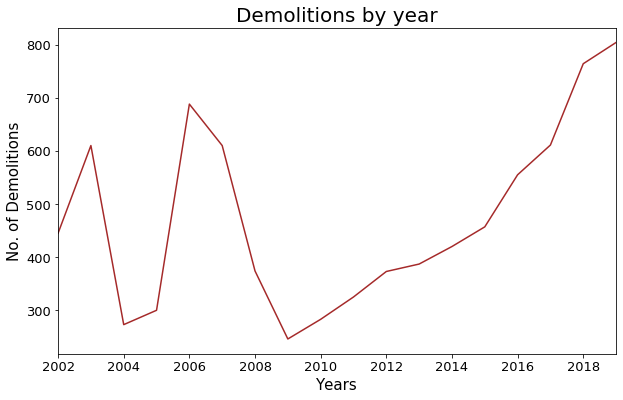

In [10]:
ax = df.Year.value_counts().sort_index(ascending = 'TRUE').plot(kind='line', figsize=(10, 6),color= 'brown', fontsize=13);
ax.set_xlabel('Years', fontsize = '15')           # To set x axis label
ax.set_ylabel('No. of Demolitions', fontsize = '15')  # To set y axis label
ax.set_title('Demolitions by year', fontsize = '20')  # To set title 

* __The above represents number of demolitions permits given in each year from 2002 to 2019__
* __From the year 2002-2009 number of demolition permits Issued has been Increasing and decreasing for every year until 2009__
* __From the year 2009-2018 number of demolition permits Issued kept on Increasing every year__


> __Create a new column 'Season' with the Month from DateIssue column__

In [11]:
df['Season'] = df.DateIssue.dt.month    
df

,CaseNum,Block,Lot,PropertyAddress,PermitNum,DateIssue,PermitDescription,Cost_Est,DateExpire,Prop_Use,Existing_Use,Neighborhood,PoliceDistrict,CouncilDistrict,Location,Year,Season
0,DEM2002-00004,1858,029,2711 FOSTER AVE,DEM2002-00004,2002-06-05,authorization to raze building by dismantling ...,18000.0,12/05/2002,NaN,NaN,CANTON,Southeastern,1.0,"2711 FOSTER AVE\nBaltimore, MD\n(39.284173, -7...",2002,6
1,DEM2002-00005,8415,028,5207 MUTH AVE,DEM2002-00005,2002-04-25,authorization to raze bldg by dismantling incl...,10000.0,NaN,NaN,NaN,FRANKLINTOWN,Southwestern,8.0,"5207 MUTH AVE\nBaltimore, MD\n(39.310268, -76....",2002,4
2,DEM2002-00006,1602,034,827 RUTLAND AVE,DEM2002-00006,2002-04-29,authorization to raze buildings by dismantling...,3000.0,NaN,NaN,NaN,MIDDLE EAST,NaN,NaN,"827 RUTLAND AVE\nBaltimore, MD\n(39.300273, -7...",2002,4
3,DEM2002-00008,5180A,020,709 WINSTON AVE,DEM2002-00008,2002-05-09,authorization to raze bldg by dislmantling inc...,18000.0,11/09/2002,NaN,NaN,WINSTON-GOVANS,Northern,4.0,"709 WINSTON AVE\nBaltimore, MD\n(39.349859, -7...",2002,5
4,DEM2002-00009,7186,003,1420 CEDDOX ST,DEM2002-00009,2002-05-02,authorization to raze bldg by dismantling incl...,5000.0,07/15/2004,NaN,NaN,CURTIS BAY,NaN,NaN,"1420 CEDDOX ST\nBaltimore, MD\n(39.221051, -76...",2002,5
5,DEM2002-00010,3311,011,4222 PARK HEIGHTS AVE,DEM2002-00010,2002-05-10,authorization to raze bldg by dismantling incl...,24000.0,09/25/2004,NaN,NaN,CENTRAL PARK HEIGHTS,Northwestern,6.0,"4222 PARK HEIGHTS AVE\nBaltimore, MD\n(39.3372...",2002,5
6,DEM2002-00011,2254,020,3525 W CATON AVE,DEM2002-00011,2002-05-13,authorization to raze bldg by dismantling incl...,7500.0,11/13/2002,NaN,NaN,SAINT JOSEPHS,Southwestern,8.0,"3525 W CATON AVE\nBaltimore, MD\n(39.287414, -...",2002,5
7,DEM2002-00012,0780,129,1104 WARD ST,DEM2002-00012,2002-05-03,authorization to raze bldg by dismantling incl...,29000.0,NaN,NaN,NaN,WASHINGTON VILLAGE,NaN,NaN,"1104 WARD ST\nBaltimore, MD\n(39.282104, -76.6...",2002,5
8,DEM2002-00013,7437,003,2207 ANNAPOLIS ROAD,DEM2002-00013,2002-06-21,authorization to raze bldg by dismantling incl...,4872.0,NaN,NaN,NaN,WESTPORT,Southern,10.0,"2207 ANNAPOLIS ROAD\nBaltimore, MD\n(39.264191...",2002,6
9,DEM2002-00015,1604,036,836 N CHESTER ST,DEM2002-00015,2002-05-14,yahoo! mail for samicare@yahoo.com yahoo! ...,1500.0,11/14/2002,NaN,NaN,MIDDLE EAST,Eastern,13.0,"836 N CHESTER ST\nBaltimore, MD\n(39.300556, -...",2002,5


> __Function to convert the month to respective season__
> * __December, January, February(12, 1, 2) ---> Winter__
> * __March, April, May(3, 4, 5) ---> Spring__
> * __June, July, August(6, 7, 8) ---> Summer__
> * __September, October, November(9, 10, 11) ---> Autumn__

In [12]:
def func(row):
    if row['Season'] == 12 or row['Season'] == 1 or row['Season'] == 2:
        return 'winter'
    elif row['Season'] == 3 or row['Season'] == 4 or row['Season'] == 5:
        return 'spring' 
    elif row['Season'] == 6 or row['Season'] == 7 or row['Season'] == 8:
        return 'summer' 
    else:
        return 'autumn'

df['Season'] = df.apply(func, axis=1)
df

,CaseNum,Block,Lot,PropertyAddress,PermitNum,DateIssue,PermitDescription,Cost_Est,DateExpire,Prop_Use,Existing_Use,Neighborhood,PoliceDistrict,CouncilDistrict,Location,Year,Season
0,DEM2002-00004,1858,029,2711 FOSTER AVE,DEM2002-00004,2002-06-05,authorization to raze building by dismantling ...,18000.0,12/05/2002,NaN,NaN,CANTON,Southeastern,1.0,"2711 FOSTER AVE\nBaltimore, MD\n(39.284173, -7...",2002,summer
1,DEM2002-00005,8415,028,5207 MUTH AVE,DEM2002-00005,2002-04-25,authorization to raze bldg by dismantling incl...,10000.0,NaN,NaN,NaN,FRANKLINTOWN,Southwestern,8.0,"5207 MUTH AVE\nBaltimore, MD\n(39.310268, -76....",2002,spring
2,DEM2002-00006,1602,034,827 RUTLAND AVE,DEM2002-00006,2002-04-29,authorization to raze buildings by dismantling...,3000.0,NaN,NaN,NaN,MIDDLE EAST,NaN,NaN,"827 RUTLAND AVE\nBaltimore, MD\n(39.300273, -7...",2002,spring
3,DEM2002-00008,5180A,020,709 WINSTON AVE,DEM2002-00008,2002-05-09,authorization to raze bldg by dislmantling inc...,18000.0,11/09/2002,NaN,NaN,WINSTON-GOVANS,Northern,4.0,"709 WINSTON AVE\nBaltimore, MD\n(39.349859, -7...",2002,spring
4,DEM2002-00009,7186,003,1420 CEDDOX ST,DEM2002-00009,2002-05-02,authorization to raze bldg by dismantling incl...,5000.0,07/15/2004,NaN,NaN,CURTIS BAY,NaN,NaN,"1420 CEDDOX ST\nBaltimore, MD\n(39.221051, -76...",2002,spring
5,DEM2002-00010,3311,011,4222 PARK HEIGHTS AVE,DEM2002-00010,2002-05-10,authorization to raze bldg by dismantling incl...,24000.0,09/25/2004,NaN,NaN,CENTRAL PARK HEIGHTS,Northwestern,6.0,"4222 PARK HEIGHTS AVE\nBaltimore, MD\n(39.3372...",2002,spring
6,DEM2002-00011,2254,020,3525 W CATON AVE,DEM2002-00011,2002-05-13,authorization to raze bldg by dismantling incl...,7500.0,11/13/2002,NaN,NaN,SAINT JOSEPHS,Southwestern,8.0,"3525 W CATON AVE\nBaltimore, MD\n(39.287414, -...",2002,spring
7,DEM2002-00012,0780,129,1104 WARD ST,DEM2002-00012,2002-05-03,authorization to raze bldg by dismantling incl...,29000.0,NaN,NaN,NaN,WASHINGTON VILLAGE,NaN,NaN,"1104 WARD ST\nBaltimore, MD\n(39.282104, -76.6...",2002,spring
8,DEM2002-00013,7437,003,2207 ANNAPOLIS ROAD,DEM2002-00013,2002-06-21,authorization to raze bldg by dismantling incl...,4872.0,NaN,NaN,NaN,WESTPORT,Southern,10.0,"2207 ANNAPOLIS ROAD\nBaltimore, MD\n(39.264191...",2002,summer
9,DEM2002-00015,1604,036,836 N CHESTER ST,DEM2002-00015,2002-05-14,yahoo! mail for samicare@yahoo.com yahoo! ...,1500.0,11/14/2002,NaN,NaN,MIDDLE EAST,Eastern,13.0,"836 N CHESTER ST\nBaltimore, MD\n(39.300556, -...",2002,spring


> __To count number of cases registered for each season__

In [13]:
df.Season.value_counts()

summer    2579
winter    2026
spring    2001
autumn    1919
Name: Season, dtype: int64

> __To group the dataframe df by seasons and years__

In [14]:
data = (df.groupby(['Season', 'Year'])['Year'].count()).unstack('Season').fillna(0)
data

Season,autumn,spring,summer,winter
Year,,,,
2002,187,19,204,35
2003,131,95,264,120
2004,35,81,62,95
2005,112,34,93,61
2006,145,115,235,193
2007,75,97,171,267
2008,80,85,101,108
2009,40,81,70,55
2010,47,112,53,71


> ## __Bar graph to represent number of demolitions in each season from the year 2002 to 2019__

Text(0.5, 1.0, 'Demolitions by year and season')

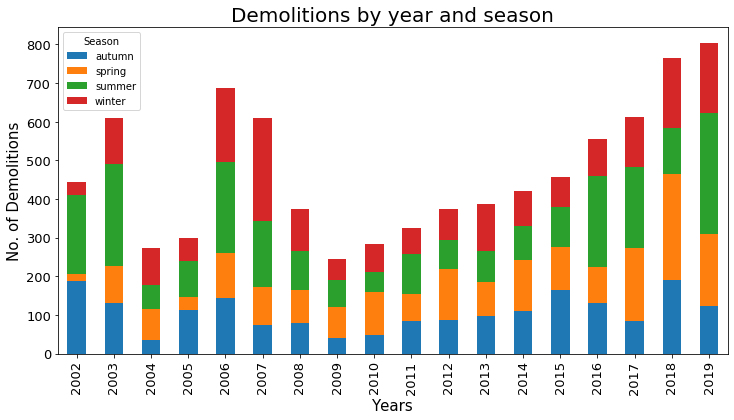

In [15]:
ax = data.plot(kind='bar', stacked = True, figsize=(12, 6), fontsize=13);
ax.set_xlabel('Years', fontsize = '15')           # To set x axis label
ax.set_ylabel('No. of Demolitions', fontsize = '15')  # To set y axis label
ax.set_title('Demolitions by year and season', fontsize = '20')  # To set title 


* __The above chart is a stacked bar graph which describes number of demolition permits issued in each season from the year 2002 to 2019__
* __From the graph it is evident that in the summer season most number of demolition permits were issued__

> ## __Hypothesis 1 : Bar graph plotted between Seasons and number of demolitions__

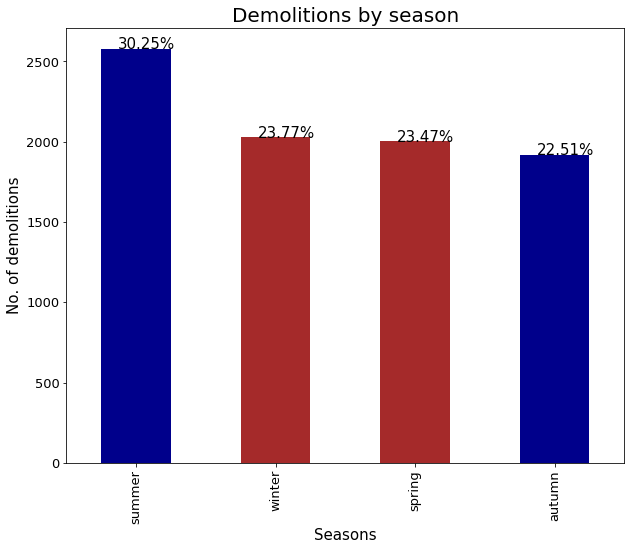

In [16]:
my_colors = list(islice(cycle(['darkblue', 'brown', 'brown', 'darkblue']), None, len(df)))
ax = df.Season.value_counts().plot(kind='bar', figsize=(10,8),color= my_colors, fontsize=13);
ax.set_xlabel('Seasons', fontsize = '15')           # To set x axis label
ax.set_ylabel('No. of demolitions', fontsize = '15')  # To set y axis label
ax.set_title('Demolitions by season', fontsize = '20')  # To set title 
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.12, i.get_height()-3, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,
                color='black')

* __The above graph describes total number of demolitions permits issued for every season from the year 2002-2019__
* __52.76% of demolition permits are issued in the seasons of summer and autumn whereas 47.24% of demolition permits are issued in the seasons of winter and spring__
* __Results from the graph support the hypothesis 1 that the number of demolition permits issued in the seasons of summer and autumn are more compared to the seasons winter and spring__

> __To find the total number of permits issued above 10000 USD and below 10000 USD__

In [17]:
df['Cost'] = (df['Cost_Est'] <= 10000)
df.Cost.value_counts()

False    5101
True     3424
Name: Cost, dtype: int64

> ## __Hypothesis 2: Bar graph plotted between Estimated cost and Demolitions__

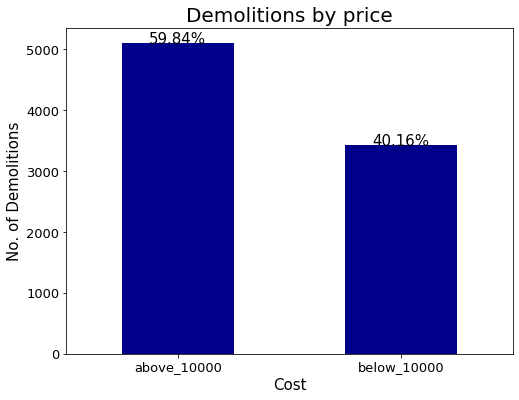

In [18]:
ax = df['Cost'].value_counts().plot(kind='bar', figsize=(8, 6),color= 'darkblue', fontsize=13);
ax.set_xlabel('Cost', fontsize = '15')           # To set x axis label
ax.set_ylabel('No. of Demolitions', fontsize = '15')  # To set y axis label
ax.set_title('Demolitions by price', fontsize = '20')  # To set title 

x1 = [False, True]
squad = ['above_10000', 'below_10000']
plt.xticks(x1, squad, rotation=0)

totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.12, i.get_height()-3, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,
                color='black')

* __The above graph represents numberbof permits issued for cost estimation of above 10000 USD and below 10000 USD__
* __59.84% of the permits estimated demolition costs are more than 10000 USD and only 40.16% are below 10000 USD__
* __Results from the graph contradicts the hypothesis 2 that the permits issued for the cost estimation above 10000 USD are fewer than the permits issued below the cost estimation of 10000 USD because the houses in the city ofbaltimore are small__


> * __Conclusion__: From the data analysis, the number of demolition permits issued in the season of summer are higher than any other seasons and from the year 2008 demolition permits issued are increasing every year gradually.

> __Learned__: 
* Different visualization techniques
* Setting individual bar labels
* Using functions in pandas
